<div style="text-align: right">Group Number 8</div>
<div style="text-align: right">Deshna Shah
11 December 2024</div>


# Impact of War on GDP, Refugee Counts, and Deaths: A Data Science Analysis

This study investigates the impact of armed conflicts on countries, specifically analyzing GDP changes, refugee outflows, and death tolls. By combining and cleaning datasets based on key indicators, we explore correlations and validate hypotheses. We employ advanced data science techniques, including regression analysis and statistical testing, to derive insights. Our findings aim to contribute to understanding the socio-economic consequences of war.

Armed conflicts disrupt economies, force displacements, and result in loss of life. Quantifying these effects provides policymakers with critical insights to address humanitarian and economic challenges. This study examines the relationships between GDP changes, refugee counts, and death tolls in war-affected countries. Lets see what we can find in this notebook. 


We start with selecting a data set for the analysis, we consider refugees population, gdp per capita, and deaths in armed conflicts.
We proceed with loading this datasets in the dataframe and and merge them. In our case the datasets are pretty neat by themselves.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt



# Paths to the CSV files
file1 = "deaths-in-armed-conflicts-based-on-where-they-occurred.csv"
file2 = "gdp-per-capita-worldbank.csv"
file3 = "number-of-refugees-per-100000.csv"
file4 = "refugee-population-by-country-or-territory-of-asylum.csv"

# Load the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)
df4 = pd.read_csv(file4)

# Merge the files based on 'Entity' and 'Year'
merged_df = df1.merge(df2, on=["Entity", "Year"], how="inner")
merged_df = merged_df.merge(df3, on=["Entity", "Year"], how="inner")
merged_df = merged_df.merge(df4, on=["Entity", "Year"], how="inner")

# Save the merged DataFrame to a new CSV file
output_file = "merged_file.csv"
merged_df.to_csv(output_file, index=False)

print(f"Merged CSV file saved to {output_file}")


Merged CSV file saved to merged_file.csv


We merged the files to a form a csv but there might be case there are duplicates or even missing values so we address that in the following by filtering the data.


While we address that, you know for us, visuals are eveything, so we proceed with some *visualization* with the top 10% of the data for each.

C:\Users\Nilay\AppData\Local\Temp\ipykernel_74928\3573740744.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Data cleaning completed. Missing values handled, and duplicates removed.
Saved 448 rows to highest_refugees.csv


,Entity,Year,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
0,Afghanistan,2002,1131,1280.4631,11742.350,0
1,Afghanistan,2003,922,1292.3335,9396.182,24
2,Afghanistan,2004,809,1260.0605,10247.847,31
3,Afghanistan,2005,1700,1352.3207,8875.955,31
4,Afghanistan,2006,4958,1366.9932,8289.418,34


Mean Refugees by country of origin per 100,000 people for filtered data (highest_refugees.csv): 3691.5017033928566


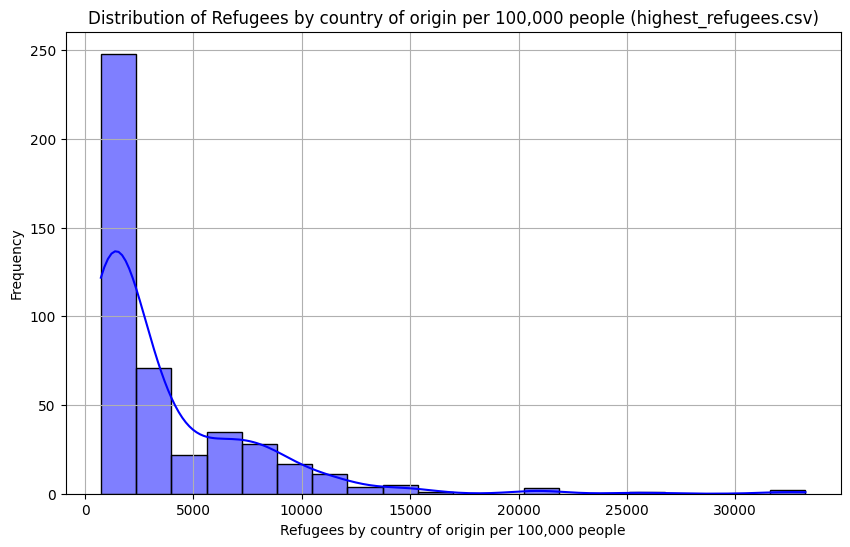

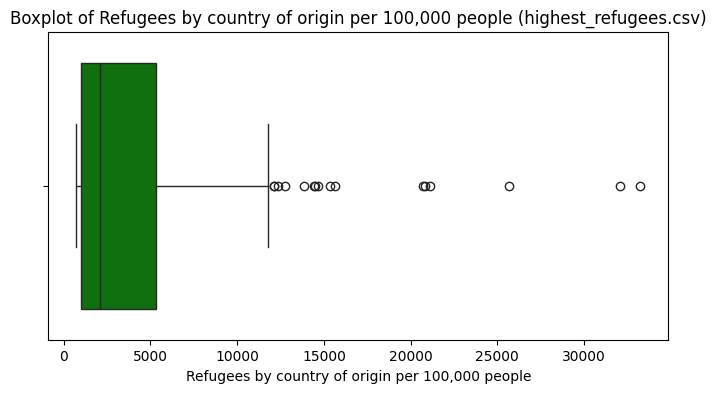

Saved 448 rows to highest_gdp.csv


,Entity,Year,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
192,Australia,2008,0,44675.140,0.173135,20915
193,Australia,2009,0,44592.145,0.105587,22543
194,Australia,2010,0,44881.324,0.171623,21790
195,Australia,2011,0,45328.258,0.169041,23423
196,Australia,2012,0,46289.184,0.205665,30061


Mean GDP per capita, PPP (constant 2017 international $) for filtered data (highest_gdp.csv): 58268.21388839286


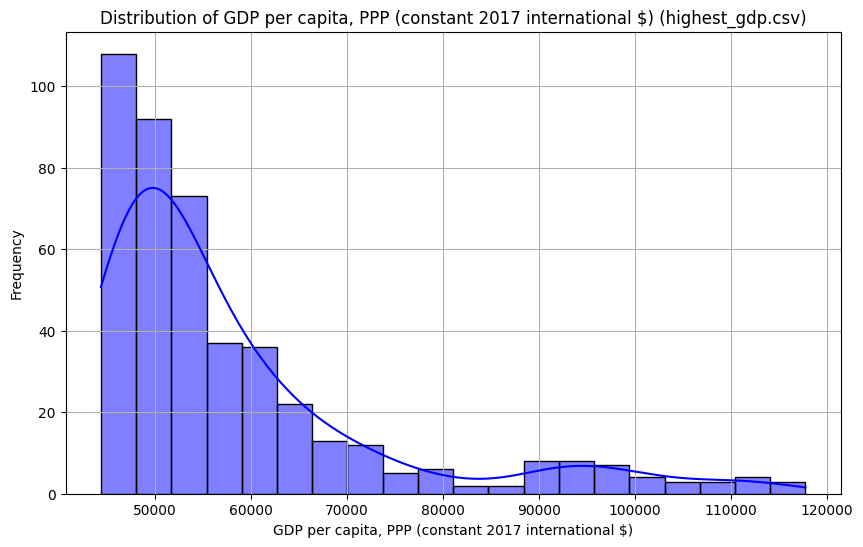

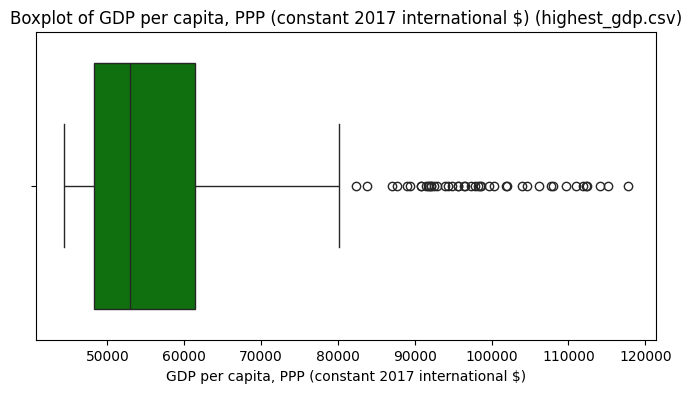

Saved 448 rows to highest_deaths.csv


,Entity,Year,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
0,Afghanistan,2002,1131,1280.4631,11742.350,0
1,Afghanistan,2003,922,1292.3335,9396.182,24
2,Afghanistan,2004,809,1260.0605,10247.847,31
3,Afghanistan,2005,1700,1352.3207,8875.955,31
4,Afghanistan,2006,4958,1366.9932,8289.418,34


Mean Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all for filtered data (highest_deaths.csv): 5744.151785714285


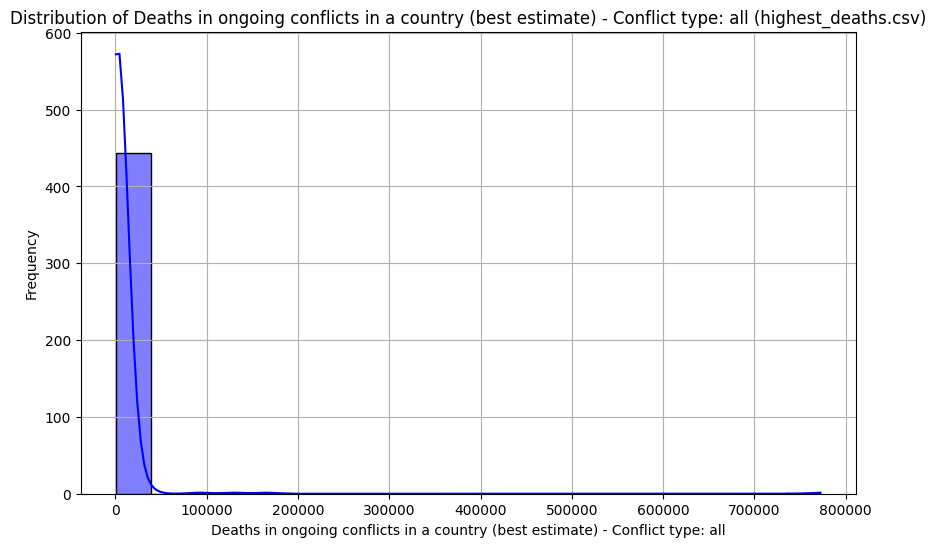

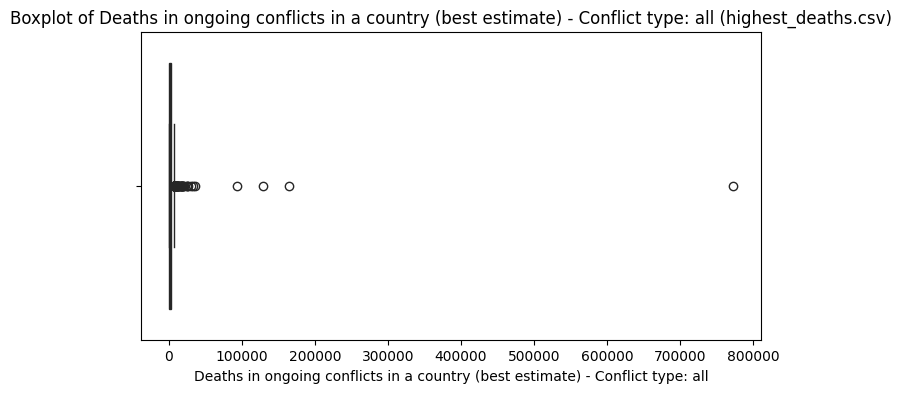

Data visualization completed.


In [27]:
# Load the combined CSV file
combined_file = "merged_file.csv"
df = pd.read_csv(combined_file)

# Cleaning the data
# 1. Handle missing values
for column in ["Refugees by country of origin per 100,000 people", 
               "GDP per capita, PPP (constant 2017 international $)", 
               "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"]:
    df[column].fillna(df[column].mean(), inplace=True)

# Drop rows with missing categorical values (if applicable)
df.dropna(inplace=True)

# 2. Remove duplicate entries
df.drop_duplicates(subset=["Entity", "Year"], inplace=True)

print("Data cleaning completed. Missing values handled, and duplicates removed.")

# Function to save, display, and visualize filtered data
def save_display_visualize_data(df, condition, filename, filter_column):
    # Apply the condition to filter rows
    filtered_df = df[condition]
    # Drop the unnecessary columns
    filtered_df = filtered_df.drop(columns=["Code_x", "Code_y", "Code"], errors="ignore")
    # Save the filtered data to a new CSV file
    filtered_df.to_csv(filename, index=False)
    print(f"Saved {len(filtered_df)} rows to {filename}")
    # Display a preview of the filtered data
    display(filtered_df.head())
    # Calculate and display the mean of the filtered column
    mean_value = filtered_df[filter_column].mean()
    print(f"Mean {filter_column} for filtered data ({filename}): {mean_value}")
    
    # Visualize the distribution of the filtered column
    plt.figure(figsize=(10, 6))
    sns.histplot(filtered_df[filter_column], kde=True, bins=20, color="blue")
    plt.title(f"Distribution of {filter_column} ({filename})")
    plt.xlabel(filter_column)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()
    
    # Boxplot for understanding spread
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=filtered_df[filter_column], color="green")
    plt.title(f"Boxplot of {filter_column} ({filename})")
    plt.show()
    
    return filtered_df, mean_value

# 1. Filter by Highest Refugee Counts (top 10%)
threshold_refugees = df["Refugees by country of origin per 100,000 people"].quantile(0.90)
condition_refugees = df["Refugees by country of origin per 100,000 people"] >= threshold_refugees
filtered_refugees, mean_refugees = save_display_visualize_data(
    df, condition_refugees, "highest_refugees.csv", 
    "Refugees by country of origin per 100,000 people"
)

# 2. Filter by Most GDP Increase (top 10%)
threshold_gdp = df["GDP per capita, PPP (constant 2017 international $)"].quantile(0.90)
condition_gdp = df["GDP per capita, PPP (constant 2017 international $)"] >= threshold_gdp
filtered_gdp, mean_gdp = save_display_visualize_data(
    df, condition_gdp, "highest_gdp.csv", 
    "GDP per capita, PPP (constant 2017 international $)"
)

# 3. Filter by Ranked Deaths (top 10%)
threshold_deaths = df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"].quantile(0.90)
condition_deaths = df["Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"] >= threshold_deaths
filtered_deaths, mean_deaths = save_display_visualize_data(
    df, condition_deaths, "highest_deaths.csv", 
    "Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all"
)

print("Data visualization completed.")


That makes some sense right? or at least it looks neat.

ids generated 

In [21]:
# Paths to the CSV files
file1 = "highest_deaths.csv"
file2 = "highest_gdp.csv"
file3 = "highest_refugees.csv"

# Load the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

# Create a unique numeric identifier by combining 'Entity' and 'Year'
# We concatenate 'Entity' and 'Year' as a string and then assign a unique numeric ID
df1['Identifier'] = pd.factorize(df1['Entity'] + "_" + df1['Year'].astype(str))[0] + 1
df2['Identifier'] = pd.factorize(df2['Entity'] + "_" + df2['Year'].astype(str))[0] + 1
df3['Identifier'] = pd.factorize(df3['Entity'] + "_" + df3['Year'].astype(str))[0] + 1

# Drop the original 'Entity' and 'Year' columns
df1.drop(['Entity', 'Year'], axis=1, inplace=True)
df2.drop(['Entity', 'Year'], axis=1, inplace=True)
df3.drop(['Entity', 'Year'], axis=1, inplace=True)

# Reorder the columns to put 'Identifier' as the first column for better readability
df1 = df1[['Identifier'] + [col for col in df1.columns if col != 'Identifier']]
df2 = df2[['Identifier'] + [col for col in df2.columns if col != 'Identifier']]
df3 = df3[['Identifier'] + [col for col in df3.columns if col != 'Identifier']]

# Show a preview of the data before saving
print("Preview of highest_deaths_with_numeric_id.csv:")
display(df1.head())

print("Preview of highest_gdp_with_numeric_id.csv:")
display(df2.head())

print("Preview of highest_refugees_with_numeric_id.csv:")
display(df3.head())

# Save the modified DataFrames to new CSV files
df1.to_csv("highest_deaths_with_numeric_id.csv", index=False)
df2.to_csv("highest_gdp_with_numeric_id.csv", index=False)
df3.to_csv("highest_refugees_with_numeric_id.csv", index=False)

print("CSV files updated with unique numeric identifiers and saved.")


Preview of highest_deaths_with_numeric_id.csv:


,Identifier,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
0,1,1131,1280.4631,11742.350,0
1,2,922,1292.3335,9396.182,24
2,3,809,1260.0605,10247.847,31
3,4,1700,1352.3207,8875.955,31
4,5,4958,1366.9932,8289.418,34


Preview of highest_gdp_with_numeric_id.csv:


,Identifier,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
0,1,0,44675.140,0.173135,20915
1,2,0,44592.145,0.105587,22543
2,3,0,44881.324,0.171623,21790
3,4,0,45328.258,0.169041,23423
4,5,0,46289.184,0.205665,30061


Preview of highest_refugees_with_numeric_id.csv:


,Identifier,Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all,"GDP per capita, PPP (constant 2017 international $)","Refugees by country of origin per 100,000 people",Refugees by destination
0,1,1131,1280.4631,11742.350,0
1,2,922,1292.3335,9396.182,24
2,3,809,1260.0605,10247.847,31
3,4,1700,1352.3207,8875.955,31
4,5,4958,1366.9932,8289.418,34


CSV files updated with unique numeric identifiers and saved.


Missing values in merged dataset:
Identifier                                                                         0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all_x    0
GDP per capita, PPP (constant 2017 international $)_x                              0
Refugees by country of origin per 100,000 people_x                                 0
Refugees by destination_x                                                          0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all_y    0
GDP per capita, PPP (constant 2017 international $)_y                              0
Refugees by country of origin per 100,000 people_y                                 0
Refugees by destination_y                                                          0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all      0
GDP per capita, PPP (constant 2017 international $)                                0
Refugees by country of origin p

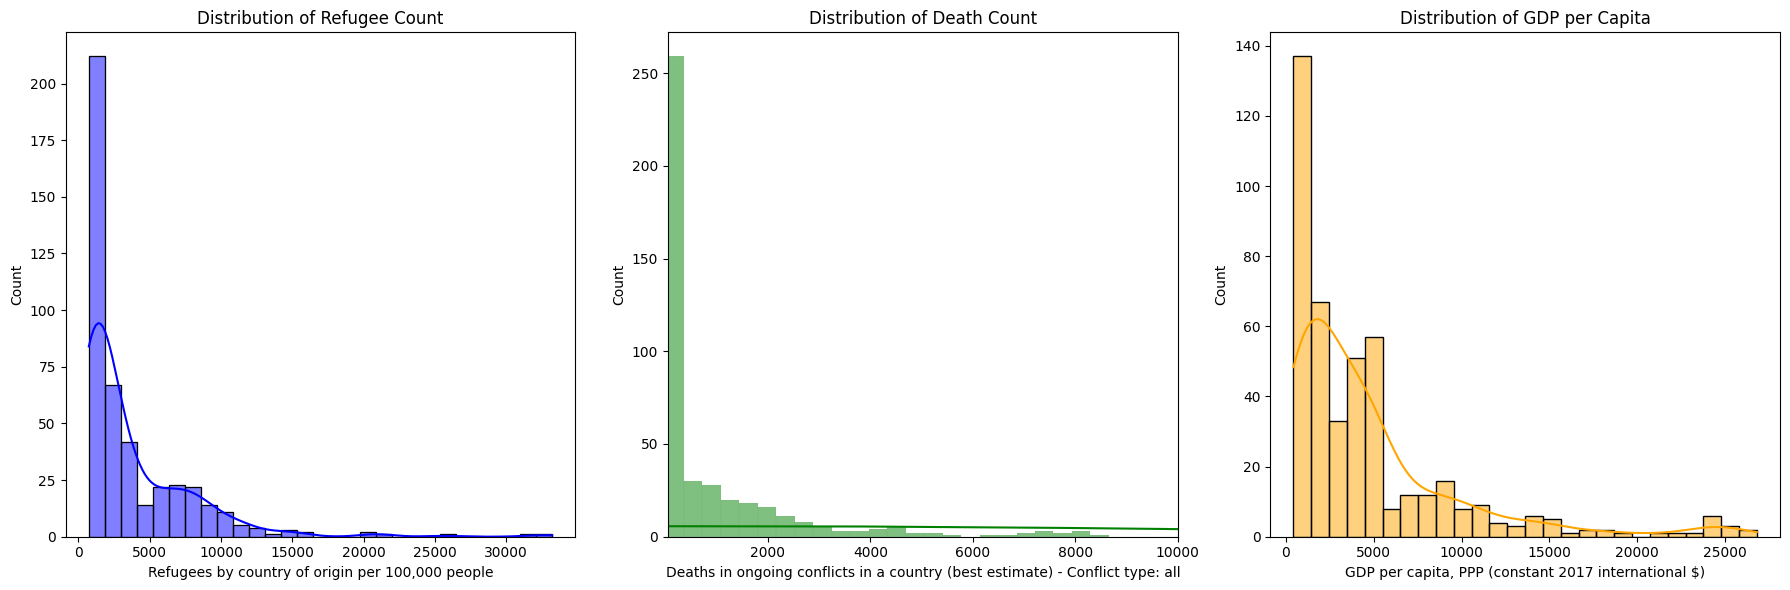

In [34]:
# Check for missing values
print("Missing values in merged dataset:")
print(merged_df.isnull().sum())

# Visualize distributions of features and target
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(merged_df['Refugees by country of origin per 100,000 people'], kde=True, color='blue') 
plt.title('Distribution of Refugee Count')

plt.subplot(1, 3, 2)
sns.histplot(merged_df['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all'], kde=True, color='green')
plt.xlim(50, 10000) 
plt.title('Distribution of Death Count')

plt.subplot(1, 3, 3)
sns.histplot(merged_df['GDP per capita, PPP (constant 2017 international $)'], kde=True, color='orange')
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()


Data loaded successfully.


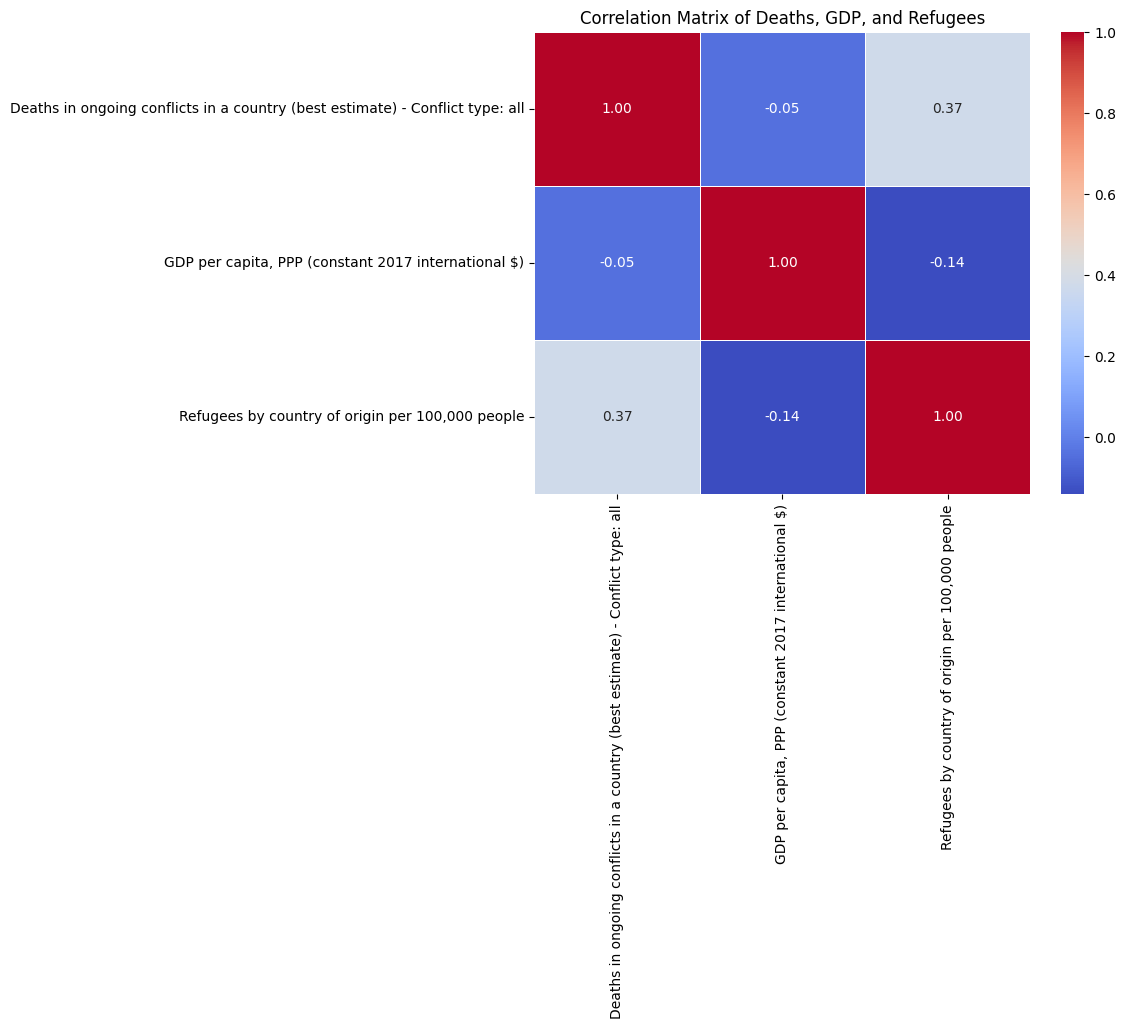


Missing values in merged dataset:
Identifier                                                                         0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all_x    0
GDP per capita, PPP (constant 2017 international $)_x                              0
Refugees by country of origin per 100,000 people_x                                 0
Refugees by destination_x                                                          0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all_y    0
GDP per capita, PPP (constant 2017 international $)_y                              0
Refugees by country of origin per 100,000 people_y                                 0
Refugees by destination_y                                                          0
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all      0
GDP per capita, PPP (constant 2017 international $)                                0
Refugees by country of origin 

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Paths to the cleaned CSV files
file1 = "highest_deaths_with_numeric_id.csv"
file2 = "highest_gdp_with_numeric_id.csv"
file3 = "highest_refugees_with_numeric_id.csv"

# Load the CSV files into DataFrames
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df3 = pd.read_csv(file3)

print("Data loaded successfully.")

# ---- Step 1: Correlation Analysis ----
# Merge the datasets on 'Identifier'
merged_df = df1.merge(df2, on="Identifier", how="inner")
merged_df = merged_df.merge(df3, on="Identifier", how="inner")

# Calculate correlation matrix
correlation_matrix = merged_df[['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all',
                                'GDP per capita, PPP (constant 2017 international $)',
                                'Refugees by country of origin per 100,000 people']].corr()

# Visualize the Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Deaths, GDP, and Refugees')
plt.show()

# Save the correlation matrix to a CSV file
correlation_matrix.to_csv("merged_correlation_matrix.csv", index=True)

# ---- Step 2: Data Exploration ----
# Check for missing values
print("\nMissing values in merged dataset:")
print(merged_df.isnull().sum())



# why two on x because we are trying to see if gdp has any effect on the death or refugeees(these two are two independent events )


Linear Regression Model Results:
Coefficients: [-737.03629617   17.00207804]
Intercept: 4709.028137387119
R-squared: 0.0106
Mean Absolute Error (MAE): 3288.6181
Mean Squared Error (MSE): 20736714.0462


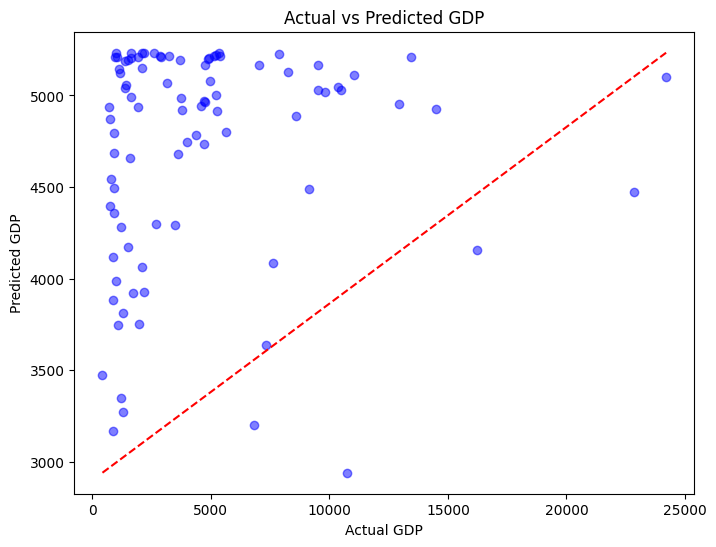

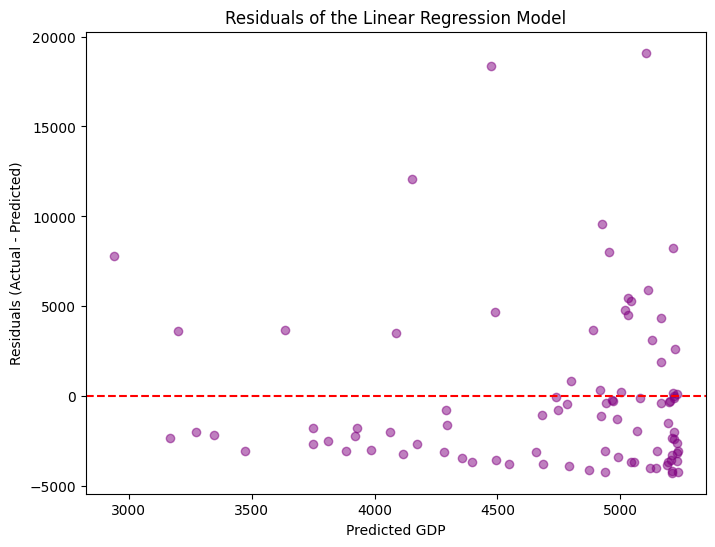

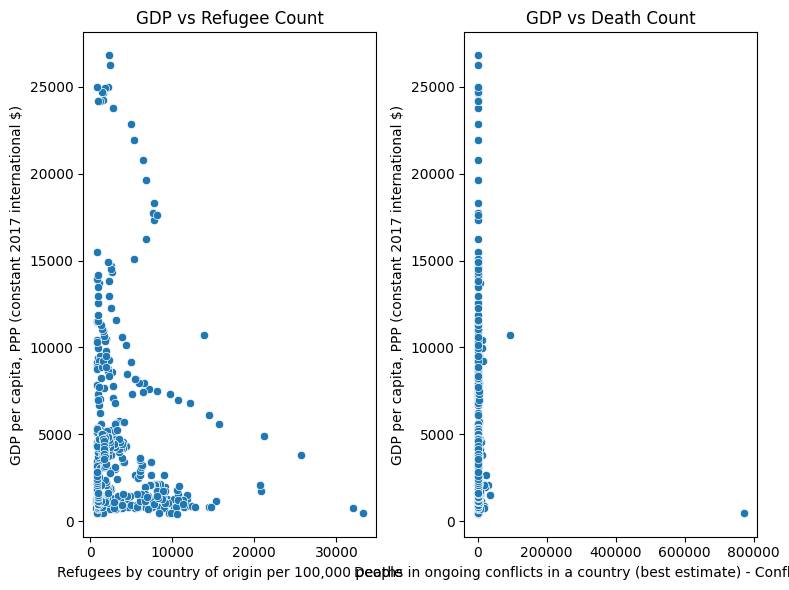

In [51]:
# ---- Step 3: Feature Scaling ----
# Prepare the features and target
X = merged_df[['Refugees by country of origin per 100,000 people',
               'Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all']]
y = merged_df['GDP per capita, PPP (constant 2017 international $)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ---- Step 4:  multiple Linear Regression Modeling ----
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print the results
print("\nLinear Regression Model Results:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Evaluate the model
r2_score = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R-squared: {r2_score:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# ---- Step 5: Visualization ----
# Actual vs Predicted GDP
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--')
plt.title('Actual vs Predicted GDP')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.show()

# Residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, y_test - y_pred, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of the Linear Regression Model')
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()

# Feature-Target Relationships
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_df['Refugees by country of origin per 100,000 people'], y=merged_df['GDP per capita, PPP (constant 2017 international $)'])
plt.title('GDP vs Refugee Count')

plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_df['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all'], y=merged_df['GDP per capita, PPP (constant 2017 international $)'])
plt.title('GDP vs Death Count')

plt.tight_layout()
plt.show()


Feature Importance:
    Feature  Coefficient  Absolute Coefficient
0  Refugees  -737.036296            737.036296
1    Deaths    17.002078             17.002078


C:\Users\Nilay\AppData\Local\Temp\ipykernel_74928\2024082585.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Coefficient', y='Feature', palette='viridis')


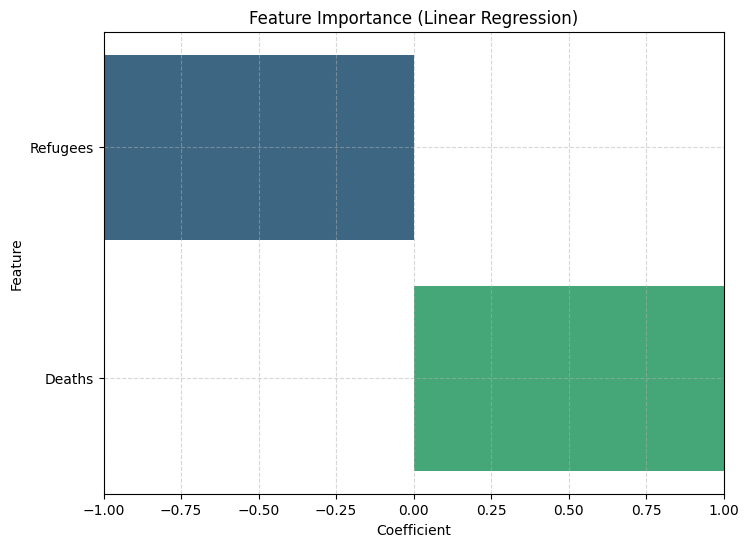

In [52]:
# ---- Step 6: Feature Importance ----
feature_names = ['Refugees', 'Deaths']
coefficients = model.coef_
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df['Absolute Coefficient'] = importance_df['Coefficient'].abs()
importance_df = importance_df.sort_values(by='Absolute Coefficient', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(data=importance_df, x='Coefficient', y='Feature', palette='viridis')
plt.grid(True, linestyle='--', alpha=0.5) 
plt.xlim(-1, 1)
plt.title('Feature Importance (Linear Regression)')
plt.show()

In [50]:
# ---- Save Results to Text File ----
output_file = "significant_analysis_results.txt"

with open(output_file, "w") as file:
    # Write correlation results
    file.write("Significant Correlation Values (abs value > 0.5):\n")
    file.write(significant_corr.to_string())
    file.write("\n\n")

    # Write regression results
    file.write("Linear Regression Model Results:\n")
    file.write(f"Coefficients: {regression_results['Coefficients']}\n")
    file.write(f"Intercept: {regression_results['Intercept']}\n")
    file.write(f"R-squared: {regression_results['R-squared']:.4f}\n")

print(f"Results saved to {output_file}")

print("\n---- Displaying Saved Results ----\n")
with open(output_file, "r") as file:
    print(file.read())


Results saved to significant_analysis_results.txt

---- Displaying Saved Results ----

Significant Correlation Values (abs value > 0.5):
                                                                               Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all  GDP per capita, PPP (constant 2017 international $)  Refugees by country of origin per 100,000 people
Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all                                                                            1.0                                                  NaN                                               NaN
GDP per capita, PPP (constant 2017 international $)                                                                                                      NaN                                                  1.0                                               NaN
Refugees by country of origin per 100,000 people                                   

Simple Linear Regression (GDP vs Refugees)

This analysis explores the relationship between refugees (per 100,000) and GDP per capita. it allows us to :

Understand Relationship: Assess if refugee count correlates with GDP positively or negatively.
Quantify Impact: Determine how GDP changes with each additional refugee.
Visualize Trends: Provide a clear, visual narrative of the data and regression line.
Policy Insights: Inform policymakers about the economic effects of refugee crises.

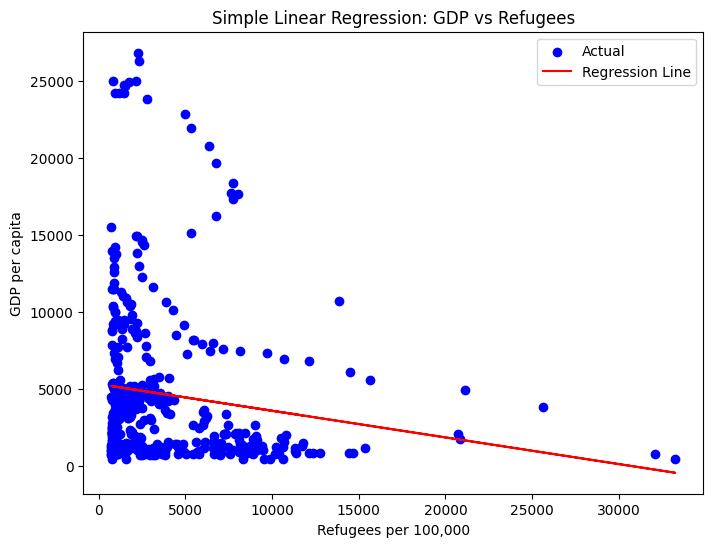

In [8]:
from sklearn.linear_model import LinearRegression

# Simple Linear Regression (GDP vs Refugees)
X = merged_df[['Refugees by country of origin per 100,000 people']]  # Predictor
y = merged_df['GDP per capita, PPP (constant 2017 international $)']  # Target

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: GDP vs Refugees')
plt.xlabel('Refugees per 100,000')
plt.ylabel('GDP per capita')
plt.legend()
plt.show()


# Multiple Linear Regression

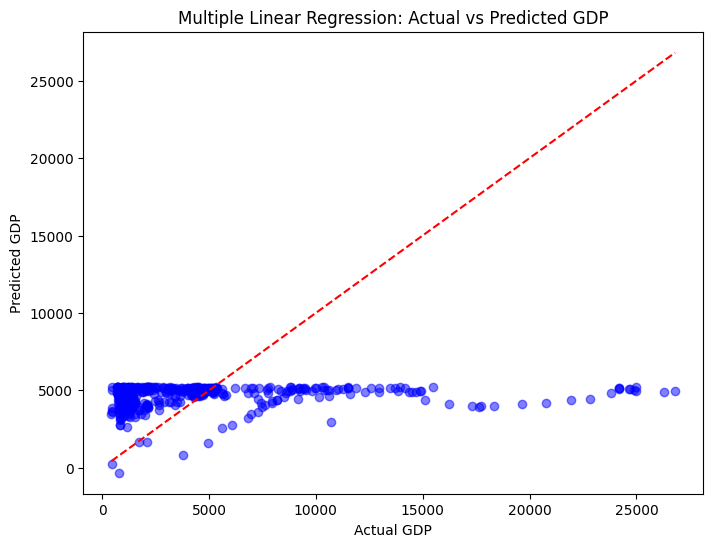

In [9]:
X = merged_df[['Refugees by country of origin per 100,000 people',
               'Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all']]
y = merged_df['GDP per capita, PPP (constant 2017 international $)']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Visualization (Actual vs Predicted GDP)
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.5)a
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.title('Multiple Linear Regression: Actual vs Predicted GDP')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.show()


# *Logistic Regression*


Understand Combined Impact: Evaluate how these predictors jointly influence GDP.
Quantify Relationships: Identify the relative contributions of each factor to GDP changes.
Model Accuracy: Compare actual GDP values with predictions to assess model performance.
Policy Insights: Highlight key drivers of economic outcomes in conflict-affected areas.

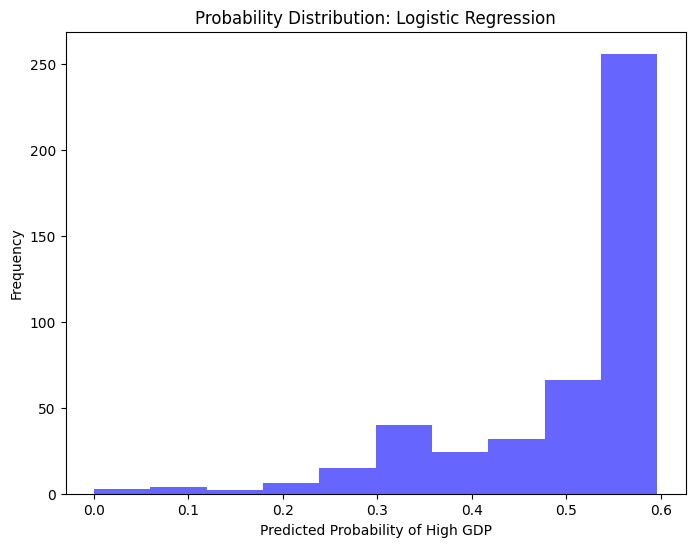

In [10]:
from sklearn.linear_model import LogisticRegression

# Create a binary target: 1 if GDP > median, else 0
threshold = merged_df['GDP per capita, PPP (constant 2017 international $)'].median()
merged_df['High_GDP'] = (merged_df['GDP per capita, PPP (constant 2017 international $)'] > threshold).astype(int)

X = merged_df[['Refugees by country of origin per 100,000 people',
               'Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all']]
y = merged_df['High_GDP']

model = LogisticRegression()
model.fit(X, y)

# Visualize probabilities
y_prob = model.predict_proba(X)[:, 1]

plt.figure(figsize=(8, 6))
plt.hist(y_prob, bins=10, alpha=0.6, color='blue')
plt.title('Probability Distribution: Logistic Regression')
plt.xlabel('Predicted Probability of High GDP')
plt.ylabel('Frequency')
plt.show()


Ridge, Lasso, and Elastic Net Regression

Ridge Coefficients: [-0.17627951  0.00100684]
Lasso Coefficients: [-0.17627951  0.00100684]
Elastic Net Coefficients: [-0.17627951  0.00100684]

Coefficient Comparison:
             Ridge     Lasso  Elastic Net
Feature                                  
Refugees -0.176280 -0.176280    -0.176280
Deaths    0.001007  0.001007     0.001007


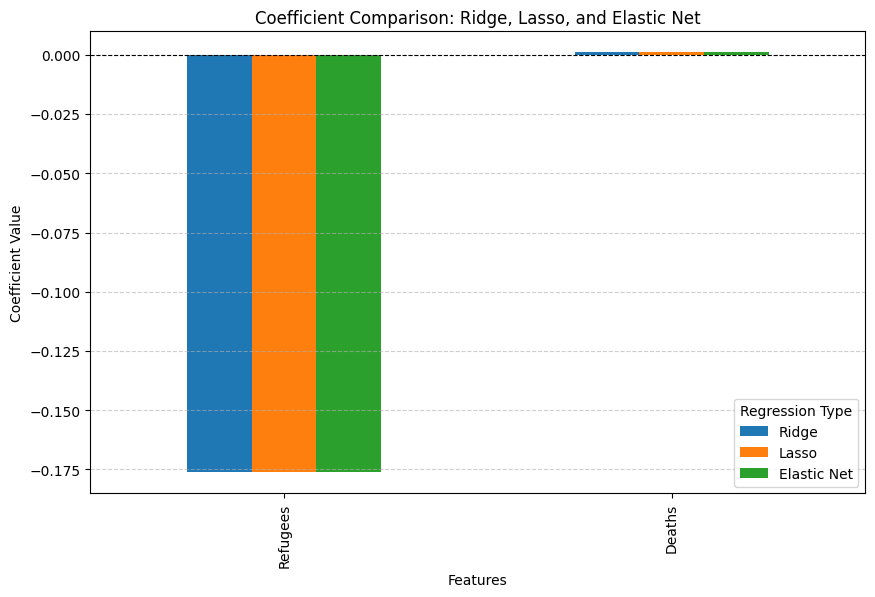

In [58]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)
print("Ridge Coefficients:", ridge.coef_)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
print("Lasso Coefficients:", lasso.coef_)

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
print("Elastic Net Coefficients:", elastic_net.coef_)

# Combine Coefficients
coefficients_df = pd.DataFrame({
    'Feature': ['Refugees', 'Deaths'],
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_,
    'Elastic Net': elastic_net.coef_
}).set_index('Feature')

print("\nCoefficient Comparison:")
print(coefficients_df)

# Visualization
coefficients_df.plot(kind='bar', figsize=(10, 6))
plt.title('Coefficient Comparison: Ridge, Lasso, and Elastic Net')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title='Regression Type')
plt.show()

what we can understand from this:
1. **Identical Coefficients Across Models**:
   - Ridge, Lasso, and Elastic Net produced the same coefficients:
     - Refugees: `-0.1763`
     - Deaths: `0.0010`
   - This suggests a simple dataset with no multicollinearity or overfitting.

2. **Minimal Impact of Deaths**:
   - The coefficient for "Deaths" is negligible, indicating little influence on GDP per capita.

3. **Negative Impact of Refugees**:
   - Refugees show a small negative effect on GDP, aligning with the potential economic strain of refugee crises.

4. **Regularization Unnecessary**:
   - Regularization penalties had no significant impact due to the simplicity of the dataset.

4. Poisson Regression


In [12]:
from sklearn.linear_model import PoissonRegressor

X = merged_df[['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all',
               'GDP per capita, PPP (constant 2017 international $)']]
y = merged_df['Refugees by country of origin per 100,000 people']

model = PoissonRegressor()
model.fit(X, y)
print("Poisson Coefficients:", model.coef_)


Poisson Coefficients: [0. 0.]


*The Poisson Regression model returning coefficients of [0. 0.] indicates that the model has not identified any meaningful relationship between the predictors (Deaths and GDP) and the target variable (Refugees)*

Coefficients: [-0.10825885 -0.0045011 ]
Intercept: -8.144365249876276e-17


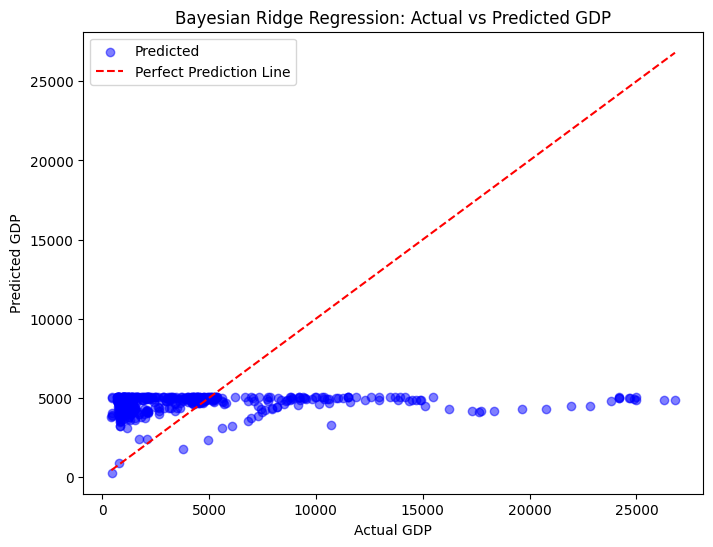

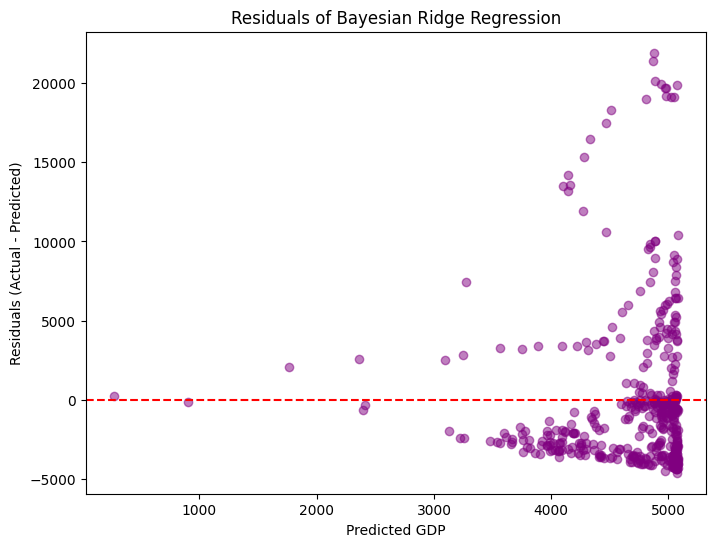

In [13]:
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt

# Prepare the data
X = merged_df[['Refugees by country of origin per 100,000 people',
               'Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all']].values
y = merged_df['GDP per capita, PPP (constant 2017 international $)'].values

# Standardize the predictors and target
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).ravel()

# Bayesian Ridge Regression Model
model = BayesianRidge()
model.fit(X_scaled, y_scaled)

# Coefficients and Intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Predict the target
y_pred = model.predict(X_scaled)

# Rescale predictions back to the original scale
y_pred_original = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).ravel()

# ---- Visualization ----
# Plot actual vs predicted GDP
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_original, color='blue', alpha=0.5, label='Predicted')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.title('Bayesian Ridge Regression: Actual vs Predicted GDP')
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.legend()
plt.show()

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_original, y - y_pred_original, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of Bayesian Ridge Regression')
plt.xlabel('Predicted GDP')
plt.ylabel('Residuals (Actual - Predicted)')
plt.show()


## Null Hypothesis (H₀): No significant correlation exists between refugee counts, GDP changes, and death tolls during armed conflicts.

## so we propsose an Alternate Hypothesis (H₁): A significant correlation exists between these indicators.

# Adding feature to showcase some correlations 
Since we see no correlation we can infer that only deaths are showcaseing some results with refugees. 

But we also what to do some science we create a synethetic feature to see we can creata new coorealation 

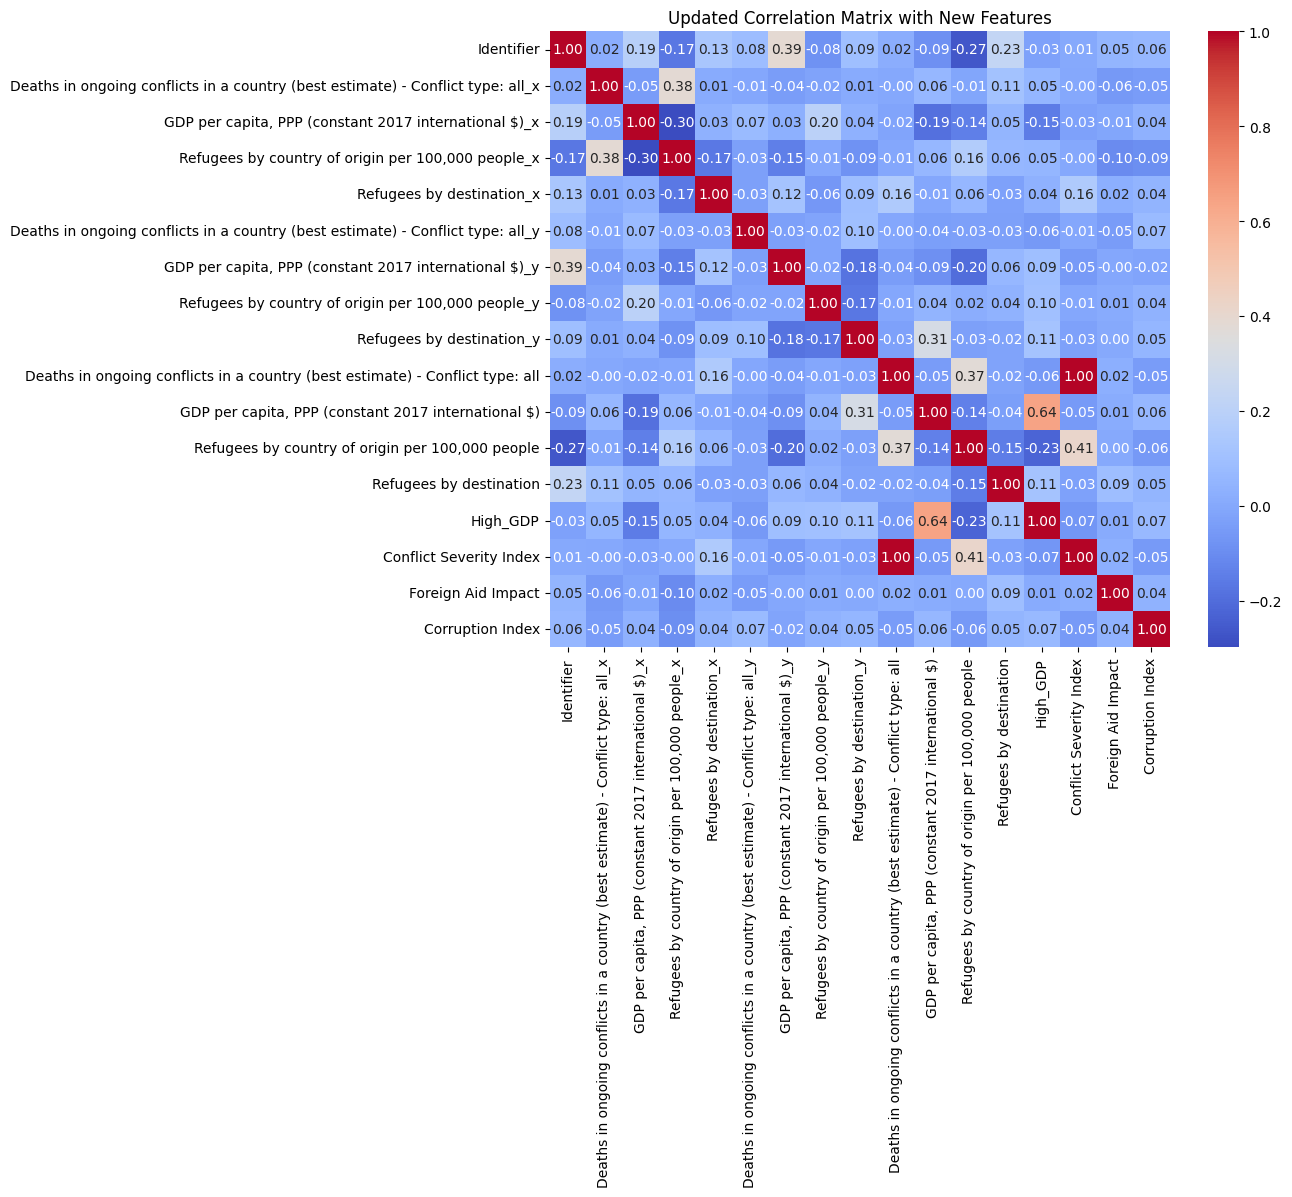

In [14]:
import numpy as np

# Add a synthetic feature: Conflict Severity Index
merged_df['Conflict Severity Index'] = (
    merged_df['Deaths in ongoing conflicts in a country (best estimate) - Conflict type: all'] * 0.7 +
    merged_df['Refugees by country of origin per 100,000 people'] * 0.3
)

# Add a synthetic feature: Foreign Aid Impact (random for simulation)
np.random.seed(42)  # For reproducibility
merged_df['Foreign Aid Impact'] = np.random.normal(loc=50, scale=10, size=len(merged_df))

# Add a synthetic feature: Corruption Index (randomly generated for demonstration)
merged_df['Corruption Index'] = np.random.uniform(0, 10, size=len(merged_df))

# Correlation matrix after adding new features
new_correlation_matrix = merged_df.corr()

# Visualize the updated correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(new_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Updated Correlation Matrix with New Features')
plt.show()


Simple Linear Regression for Conflict Severity Index:
  Coefficient: -0.0100
  Intercept: 4718.4688
  R-squared: 0.0027



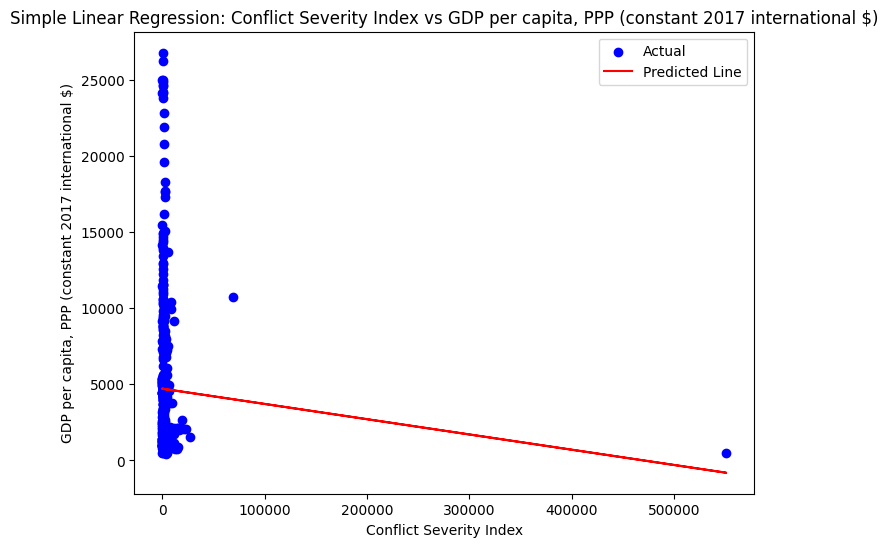

Simple Linear Regression for Foreign Aid Impact:
  Coefficient: 7.7008
  Intercept: 4296.1274
  R-squared: 0.0002



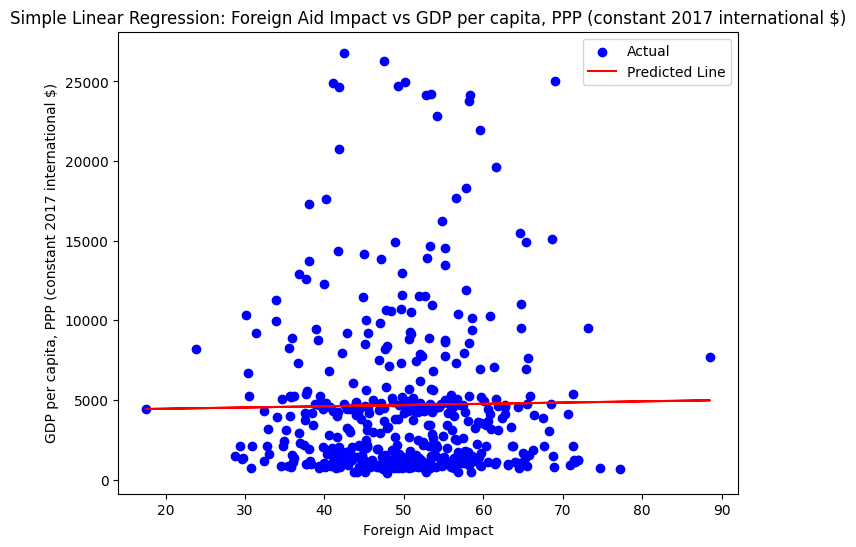

Simple Linear Regression for Corruption Index:
  Coefficient: 108.1505
  Intercept: 4167.4507
  R-squared: 0.0037



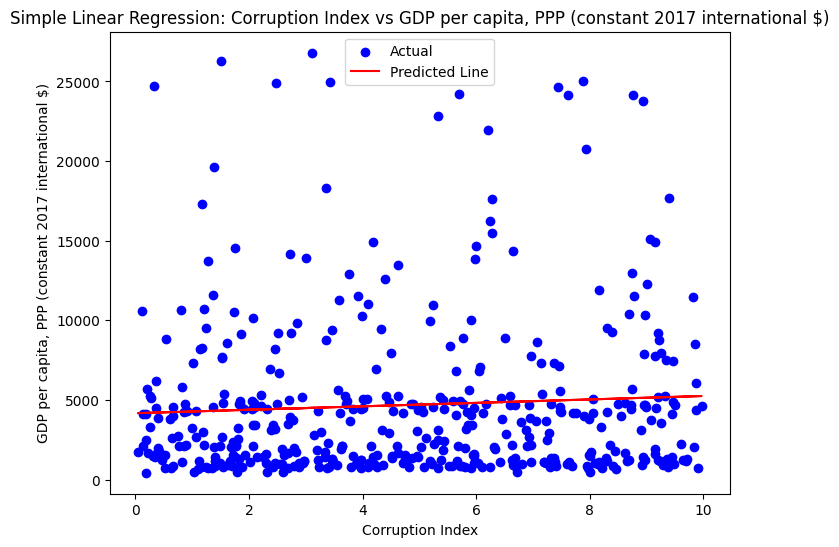

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Features to test (one at a time)
features = ['Conflict Severity Index', 'Foreign Aid Impact', 'Corruption Index']
target = 'GDP per capita, PPP (constant 2017 international $)'

# Iterate through each feature for Simple Linear Regression
for feature in features:
    X = merged_df[[feature]].values  # Reshape feature to 2D array
    y = merged_df[target].values
    
    # Fit the Simple Linear Regression model
    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)
    
    # R-squared score
    r2 = r2_score(y, y_pred)
    print(f"Simple Linear Regression for {feature}:")
    print(f"  Coefficient: {model.coef_[0]:.4f}")
    print(f"  Intercept: {model.intercept_:.4f}")
    print(f"  R-squared: {r2:.4f}\n")
    
    # Plot Actual vs Predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual')
    plt.plot(X, y_pred, color='red', label='Predicted Line')
    plt.title(f'Simple Linear Regression: {feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.legend()
    plt.show()


Expected Visual Output:
Actual vs. Predicted GDP:
Ideally, most points should cluster around the diagonal red line.
Residual Plot:
Residuals should scatter randomly around the horizontal zero line.